In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker

In [2]:
#define the columns to keep from the files when processing the data with pandas library
columns = ['Time /s', 'Step', 'Task', 'U /V', 'Capacity /Ah', 'Q charge /Ah', 'Q discharge /Ah', 'Efficiency (cycle) /none']

#variables to filter the data
StepCh_c2 = ['task_8']
Step_FullDch = ['task_6']
StepDch_p1 = ['task_10']
StepDch_p2 = ['task_12']
Tasks_type = ['CC', 'CC_CV']
Step_discharges = ['task_10', 'task_12']

In [3]:
#create the system path to reach all the files saved in Capacity Loss folder
data_path = Path('Capacity Loss')

#load the files in file_list list to allow access to test data
file_list = [file for file in data_path.iterdir() if file.is_file()]

for file in file_list:
    print(file) #show the files contained in file_list

Capacity Loss\20241121_CapaLoss_Cell A3_lowVolt_C.1.csv
Capacity Loss\20241127_CapaLoss_Cell A3_LowVolt_D.5.csv
Capacity Loss\20241212_CapaLoss_Cell A3_LowVolt_B.1.csv
Capacity Loss\20250108_CapaLoss_Cell A3_LowVolt_D.5.csv


In [ ]:
for file in file_list:
    #create dataframe df from files
    df = pd.read_csv(file, usecols = columns)
    #pre-filtering of data contained in df against tasks variable
    df_task = df[df['Task'].isin(Tasks_type)]

    # Filter data for the corresponding step
    QFullCh_df = df_task[df_task['Step'].isin(StepCh_c2)]
    Qdch1_df = df_task[df_task['Step'].isin(StepDch_p1)]
    Qdch2_df = df_task[df_task['Step'].isin(StepDch_p2)]

    # Extract the coulombic efficiency using the index location
    Coul_Eff = df['Efficiency (cycle) /none'].iloc[-2]

    # Extract the capacity data
    Q_FullCh = np.max(QFullCh_df['Q charge /Ah'])
    Qdch_part1 = np.max(Qdch1_df['Q discharge /Ah'])
    Qdch_part2 = np.max(Qdch2_df['Q discharge /Ah'])

    Theoric_Capacity_discharged = Q_FullCh * Coul_Eff
    Total_Capacity_remaining = Qdch_part1 + Qdch_part2
    Capacity_lost_after_storage = Theoric_Capacity_discharged - (Qdch_part1 + Qdch_part2)

    print(f'\033[1m{Path(file).stem}\033[0m\n'
          f' {Q_FullCh:.4f} Ah\n' 
          f' Full capacity: {Theoric_Capacity_discharged:.4f} Ah\n' 
          f' Capacity retained after storage: {Total_Capacity_remaining:.4f} Ah\n' 
          f' Capacity lost during storage (2 days): {Capacity_lost_after_storage:.4f} Ah\n'
          f' Coulombic efficiency: {100*Coul_Eff:.4f}%\n'
          f' Q1 = {Qdch_part1:.4f} Ah, Q2 = {Qdch_part2:.4f} Ah\n')

20241121_CapaLoss_Cell A3_lowVolt_C.1
 41.8380 Ah
 Full capacity: nan Ah
 Capacity retained after storage: 39.9945 Ah
 Capacity lost during storage (2 days): nan Ah
 Coulombic efficiency: nan%
 Q1 = 0.0056 Ah, Q2 = 39.9889 Ah

20241127_CapaLoss_Cell A3_LowVolt_D.5
 41.7289 Ah
 Full capacity: 41.2129 Ah
 Capacity retained after storage: 40.0258 Ah
 Capacity lost during storage (2 days): 1.1870 Ah
 Coulombic efficiency: 98.7635%
 Q1 = 0.0056 Ah, Q2 = 40.0202 Ah

20241212_CapaLoss_Cell A3_LowVolt_B.1
 41.1371 Ah
 Full capacity: 42.2809 Ah
 Capacity retained after storage: 39.8688 Ah
 Capacity lost during storage (2 days): 2.4121 Ah
 Coulombic efficiency: 102.7803%
 Q1 = 24.9817 Ah, Q2 = 14.8871 Ah

20250108_CapaLoss_Cell A3_LowVolt_D.5
 41.4346 Ah
 Full capacity: 40.9768 Ah
 Capacity retained after storage: 39.7456 Ah
 Capacity lost during storage (2 days): 1.2312 Ah
 Coulombic efficiency: 98.8950%
 Q1 = 24.9459 Ah, Q2 = 14.7997 Ah



Values of data point for Discharge_part1
 Capacity = 0.006 Ah, Cell potential = 3.35676 V
Values of data point for Discharge_part2
 Capacity = 1.237 Ah, Cell potential = 3.30341 V
Cell potential decrease upon storage = 26.674008 mV

Values of data point for Discharge_part1
 Capacity = 0.006 Ah, Cell potential = 3.36743 V
Values of data point for Discharge_part2
 Capacity = 1.237 Ah, Cell potential = 3.30397 V
Cell potential decrease upon storage = 31.727505 mV

Values of data point for Discharge_part1
 Capacity = 24.982 Ah, Cell potential = 3.24576 V
Values of data point for Discharge_part2
 Capacity = 26.213 Ah, Cell potential = 3.23846 V
Cell potential decrease upon storage = 3.648356 mV

Values of data point for Discharge_part1
 Capacity = 24.946 Ah, Cell potential = 3.24637 V
Values of data point for Discharge_part2
 Capacity = 26.177 Ah, Cell potential = 3.24011 V
Cell potential decrease upon storage = 3.125752 mV



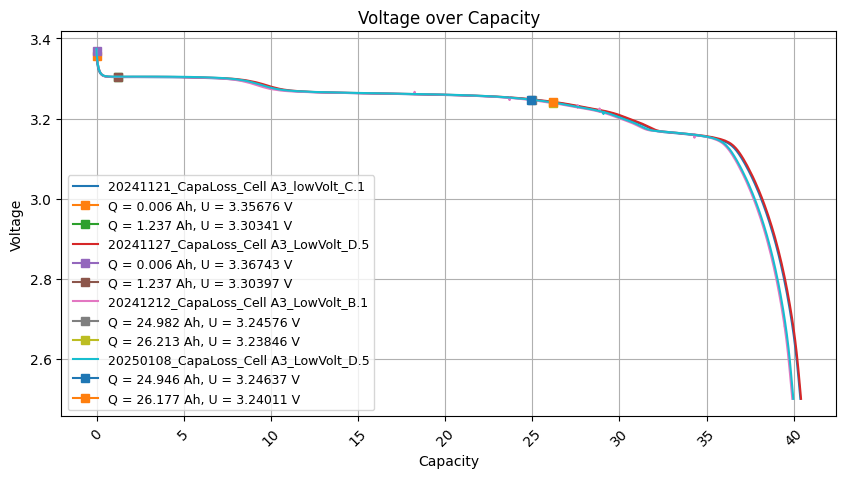

In [ ]:
plt.figure(figsize=(10, 5))

for file in file_list:
    #create dataframe df from files
    df = pd.read_csv(file, usecols = columns)
    
    Voltage_df = df[(df['Task'].isin(Tasks_type)) & (df['Step'].isin(Step_FullDch))]
    Capacity_df = df[(df['Task'].isin(Tasks_type)) & (df['Step'].isin(Step_FullDch))]
    
    Voltage = Voltage_df['U /V']
    Capacity = Capacity_df['Q discharge /Ah']

    plt.plot(Capacity, Voltage, label = Path(file).stem)

    Qdch_p1_df = df[(df['Step'].isin(StepDch_p1))]
    Capacity_Dch1 = np.max(Qdch_p1_df['Q discharge /Ah'])
    QDch_p1 = df[df['Q discharge /Ah'] == Capacity_Dch1]
    Voltage_Dch1 = QDch_p1['U /V'].values[0]

    Capacity_after_storage = Capacity_Dch1 + Capacity_lost_after_storage

    Rectified_Voltage = np.interp(Capacity_after_storage, Capacity, Voltage)

    print(f'\033[1mValues of data point for Discharge_part1\033[0m\n'
          f' Capacity = {Capacity_Dch1:.3f} Ah, Cell potential = {Voltage_Dch1:.5f} V\n'
          f'\033[1mValues of data point for Discharge_part2\033[0m\n'
          f' Capacity = {Capacity_after_storage:.3f} Ah, Cell potential = {Rectified_Voltage:.5f} V\n'
          f'\033[1mCell potential decrease upon storage = {(Voltage_Dch1 - Rectified_Voltage)*1000 /2:5f} mV\033[0m\n'
          )

    plt.plot(Capacity_Dch1, Voltage_Dch1, marker = 's', label = f'Q = {Capacity_Dch1:.3f} Ah, U = {Voltage_Dch1:.5f} V')
    plt.plot(Capacity_after_storage, Rectified_Voltage, marker = 's', label = f'Q = {Capacity_after_storage:.3f} Ah, U = {Rectified_Voltage:.5f} V')

plt.xlabel('Capacity')
plt.ylabel('Voltage')
plt.title('Voltage over Capacity')
plt.xticks(rotation=45)
plt.legend(fontsize = 9)

plt.grid()
plt.show()